In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root
from math import *

import seaborn as sns
sns.set_style('darkgrid')

import ipywidgets as widgets

In [2]:
np.set_printoptions(precision=64)

In [31]:
a = np.float64(1e-12) #pp[0]

h = np.float64(1.054e-27) #pp[3]

m = np.float64(9.1e-28) #pp[1]

U_0 = np.float64(5e7 * 1.6e-12) #pp[2]

pp = (a, m, U_0, m)

In [32]:
def f(xi, pp):
    return  np.sqrt(1/xi - 1) - 1/np.tan(np.sqrt(2 * pp[0] * pp[0] * pp[1] * pp[2] /(pp[3]**2) * (1 - xi)))

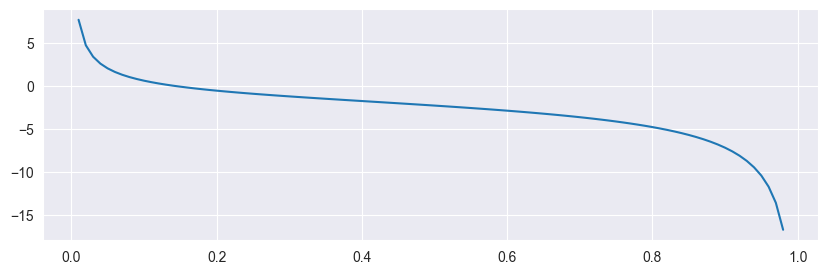

In [49]:
x = np.arange(0.01, 0.99, 0.01)
plt.figure(figsize=(10, 3))
plt.plot(x, f(x,pp))
plt.show()

In [34]:
def dichotomy(f,pp, a, b, eps=1e-10):
    f_a = f(a, pp)
    f_b = f(b, pp)
    count = 0
    if f_a *  f_b > 0:
        raise ValueError("The function must have opposite signs at points a and b")
        
    while True:
        count += 1
        c = (a + b) / 2
        f_c = f(c, pp)
        if f_c == 0 or (b - a) / 2 < eps:
            return (c, count)
        elif f_a * f_c < 0:
            b = c
        else:
            a = c

In [67]:
a = 0.08
b = 0.2

result, count = dichotomy(f,pp, a,b)
print("result = {:.10f}, number of operations = {}".format(result, count))
#theoretical number of iterations
eps_0 = 1e-1
eps=1e-10
print(round(np.log10(eps_0/eps)/np.log10(2)))

result = 0.1432273774, number of operations = 31
30


In [68]:
multiplier = 2 * pp[0] * pp[0] * pp[1] * pp[2] /(pp[3]**2)
def derivative(xi):
    return (multiplier * xi)/(2*np.sqrt(multiplier*(1-xi))*np.sin(multiplier * (1 - xi))**2) - 1/(2*(xi**2)*(np.sqrt(1/xi - 1)))
    

In [37]:
def simple_iterations(f, derivative, pp, xi_0, epsilon=1e-10):
    count = 0
    
    f_xi = f(xi_0, pp)
    d_fxi = derivative(xi_0)
    
    multiplier = 1 / d_fxi
    xi = xi_0
    xi_new = xi - (f_xi * multiplier)
    
    while(np.abs(xi_new - xi) > epsilon):
        count += 1
        xi = xi_new
        f_xi = f(xi, pp)
        xi_new = xi - (f_xi * multiplier)
        print(f_xi * multiplier)
    
    return (xi_new, count)

In [65]:
result = simple_iterations(f, derivative, pp, np.float64(0.08))

print("result = {:.10f}, number of iterations = {}".format(result[0], result[1]))

#theoretical number of iterations
eps_0 = 1e-1
eps=1e-10
print(round(np.log10(eps_0/eps)/(np.log10(np.abs(derivative(0.14)+1)))))

-0.009292187774282826
-0.003952848743964334
-0.001814773758210731
-0.0008573847056839919
-0.0004101578004017579
-0.00019734574303126401
-9.52111801141206e-05
-4.5995409562617134e-05
-2.2233793927307765e-05
-1.07508836463319e-05
-5.199220963800726e-06
-2.5145663400689297e-06
-1.2161937569352767e-06
-5.88233322363566e-07
-2.8451158113839694e-07
-1.3761062119572626e-07
-6.655869126473366e-08
-3.2192743216150655e-08
-1.5570816517867353e-08
-7.531212123615573e-09
-3.6426581863783898e-09
-1.7618623508702704e-09
-8.521686343847377e-10
-4.121726103602739e-10
-1.9935756359704691e-10
-9.642427340234762e-11
result = 0.1432273774, number of iterations = 26
10


In [57]:
def newtons_method(f, derivative, pp, xi_0, epsilon=np.float64(1e-10)):
    count = 0
    
    f_xi = f(xi_0, pp)
    d_fxi = derivative(xi_0)
    
    xi = xi_0
    xi_new = xi -(f_xi / d_fxi)
    print(1/derivative(xi))
    while(np.abs(xi_new - xi) > epsilon):
        count += 1
        xi = xi_new
        f_xi = f(xi, pp)
        xi_new = xi - (f_xi / derivative(xi))
        print((f_xi / derivative(xi)))
    
    return (xi_new, count)
    

In [66]:
result = newtons_method(f, derivative, pp, np.float64(0.08))
print("result = {:.10f}, number of iterations = {}".format(result[0], result[1]))

-0.04471543089440511
-0.019466163144985636
0.0038294683593380397
-0.0014382968634326359
0.0004974322839254685
-0.000177765237544967
6.282737793626457e-05
-2.2293760413465395e-05
7.89963733688213e-06
-2.8005790948799157e-06
9.926855803273537e-07
-3.518866745786385e-07
1.247338349405366e-07
-4.421495133842448e-08
1.5673024606151913e-08
-5.555675927852943e-09
1.9693406607916873e-09
-6.980795407372144e-10
2.474508765996704e-10
-8.771482112100343e-11
result = 0.1432273775, number of iterations = 19
